In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\position_salary.csv")
print(data.head(10))

                            Position   Location  Gender    Education  \
0  QNXT Configuration QA/Testing SME  Ghaziabad  Female  B.Tech/B.E.   
1           Provider Data Management  New Delhi  Female  B.Tech/B.E.   
2          Accessibility Engineer QA      Noida  Female          BCA   
3           Senior Software Engineer  Jalandhar    Male          NaN   
4         Java Developer/Spring Boot     Meerut    Male          B.A   
5                         iOS Tester   Padampur  Female        B.Com   
6                GCP Cloud Architect  New Delhi    Male  B.Tech/B.E.   
7   Technical Project Manager Remote       Pune    Male          BCA   
8                Provider Data Setup     Kannur  Female          BCA   
9                         iOS Tester   Gurugram  Female  B.Tech/B.E.   

   Experience (Years)   Salary  
0                  11  2014510  
1                  24  1624349  
2                  25  1926223  
3                  27  2403560  
4                  11  1128404  
5        

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Position            3448 non-null   object
 1   Location            3467 non-null   object
 2   Gender              3443 non-null   object
 3   Education           3391 non-null   object
 4   Experience (Years)  3467 non-null   int64 
 5   Salary              3467 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 162.6+ KB
None


In [4]:
print(data.isnull().sum())


Position              19
Location               0
Gender                24
Education             76
Experience (Years)     0
Salary                 0
dtype: int64


In [5]:
data_cleaned = data.dropna()  # Drops all rows with NaN values


In [6]:
data['Position'] = data['Position'].fillna(data['Position'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])


In [7]:
data['Education'] = data['Education'].fillna(data['Education'].mode()[0])
print(data)

                               Position   Location  Gender    Education  \
0     QNXT Configuration QA/Testing SME  Ghaziabad  Female  B.Tech/B.E.   
1              Provider Data Management  New Delhi  Female  B.Tech/B.E.   
2             Accessibility Engineer QA      Noida  Female          BCA   
3              Senior Software Engineer  Jalandhar    Male  B.Tech/B.E.   
4            Java Developer/Spring Boot     Meerut    Male          B.A   
...                                 ...        ...     ...          ...   
3462               Salesforce developer  Hyderabad    Male  B.Tech/B.E.   
3463               Salesforce developer  Bengaluru    Male          BCA   
3464               Salesforce developer  New Delhi  Female  B.Tech/B.E.   
3465               Salesforce developer   Gurugram    Male          B.A   
3466               Salesforce developer       Pune    Male        B.Com   

      Experience (Years)   Salary  
0                     11  2014510  
1                     24  1

In [8]:
print(data.isnull().sum())


Position              0
Location              0
Gender                0
Education             0
Experience (Years)    0
Salary                0
dtype: int64


In [9]:
# Total number of entries and unique positions
print("Total Entries:", data.shape[0])
print("Unique Positions:", data['Position'].nunique())

# Most and least common job positions
print("Most Common Positions:")
print(data['Position'].value_counts().head())

print("\nLeast Common Positions:")
print(data['Position'].value_counts().tail())

# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Total Entries: 3467
Unique Positions: 808
Most Common Positions:
Position
Research Analyst    353
Cuda Developer      153
Maths Teacher       111
C++                  99
ServiceNow           71
Name: count, dtype: int64

Least Common Positions:
Position
IOS                           1
SAS                           1
Basic Math                    1
HR Data BA, data Modelling    1
Muskan Parashar               1
Name: count, dtype: int64

Missing Values:
Position              0
Location              0
Gender                0
Education             0
Experience (Years)    0
Salary                0
dtype: int64


In [10]:
# Salary statistics
print("\nSalary Statistics:")
print(data['Salary'].describe())

# Average salary by gender
print("\nAverage Salary by Gender:")
print(data.groupby('Gender')['Salary'].mean())



Salary Statistics:
count    3.467000e+03
mean     1.487459e+06
std      5.776934e+05
min      5.026890e+05
25%      9.818155e+05
50%      1.475343e+06
75%      1.985568e+06
max      2.499925e+06
Name: Salary, dtype: float64

Average Salary by Gender:
Gender
Female    1.484507e+06
Male      1.489240e+06
Name: Salary, dtype: float64


In [11]:
# Average experience by education level
print("\nAverage Experience by Education Level:")
print(data.groupby('Education')['Experience (Years)'].mean())

# Correlation between experience and salary
correlation = data['Experience (Years)'].corr(data['Salary'])
print("\nCorrelation between Experience and Salary:", correlation)



Average Experience by Education Level:
Education
B.A                            16.282051
B.B.A/ B.M.S                   17.785047
B.Com                          16.563147
B.Des.                         14.875000
B.PHARMACY                     16.400000
B.Pharma                       14.000000
B.Sc                           16.545272
B.Tech/B.E.                    16.582791
BBA                            16.333333
BBM                            15.600000
BCA                            16.812500
BJMC                           13.625000
BTECH                          17.600000
Diploma                        17.142857
HSC                            15.428571
LLB                            21.909091
Mtech                          19.800000
Not Pursuing Graduation        18.375000
bachelor of arts               11.000000
course on computer concepts    17.500000
Name: Experience (Years), dtype: float64

Correlation between Experience and Salary: 0.03333462180768088


In [12]:
#What is the average experience for each education level?
#Does experience correlate with salary?

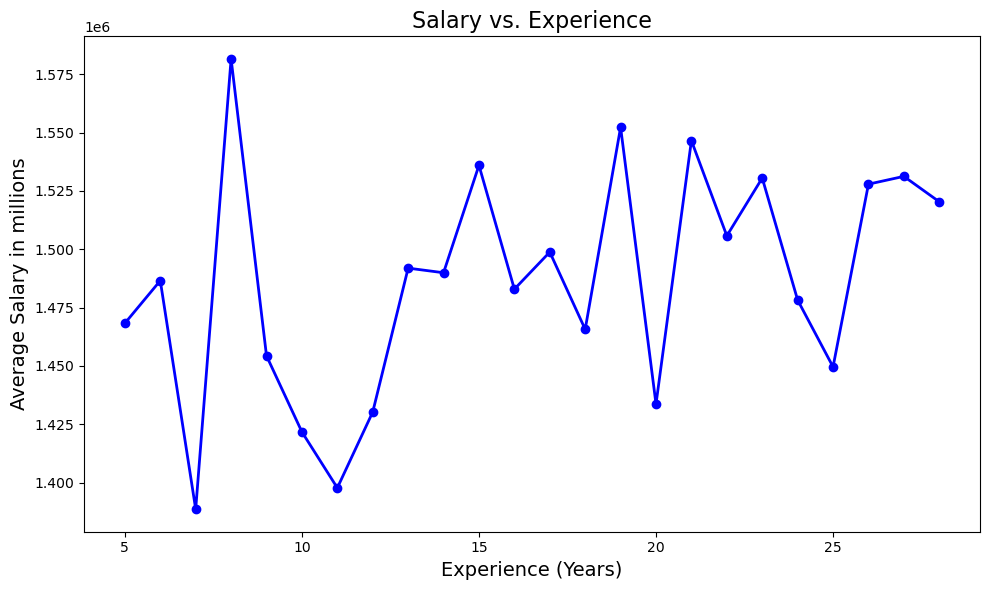

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure your data is sorted by Experience (Years) for a clearer trend
data_sorted = data.sort_values('Experience (Years)')

# Group by Experience and calculate the average salary for each experience level
avg_salary_by_experience = data_sorted.groupby('Experience (Years)')['Salary'].mean()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(avg_salary_by_experience.index, avg_salary_by_experience.values, marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)

# Adding title and labels
plt.title('Salary vs. Experience', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=14)
plt.ylabel('Average Salary in millions', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


Average Salary by Gender:
Gender
Female    1.484507e+06
Male      1.489240e+06
Name: Salary, dtype: float64


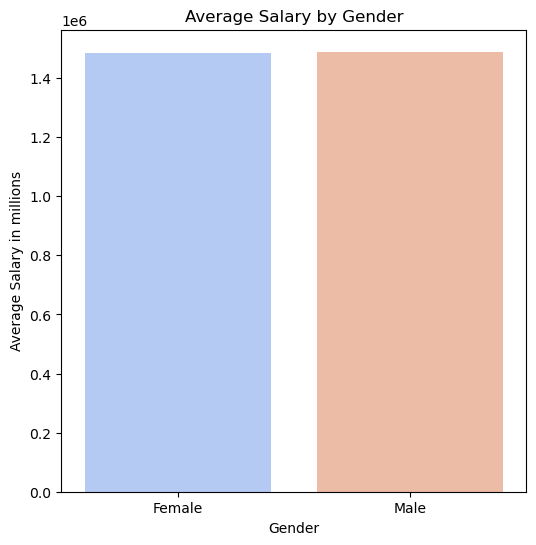

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing Gender or Salary data
gender_salary_data = data.dropna(subset=['Gender', 'Salary'])

# Calculate average salary by gender
gender_avg_salary = gender_salary_data.groupby('Gender')['Salary'].mean()

# Display average salary by gender
print("Average Salary by Gender:")
print(gender_avg_salary)

# Plot the Gender Gap in Salaries
plt.figure(figsize=(6, 6))
sns.barplot(x=gender_avg_salary.index, y=gender_avg_salary.values, palette="coolwarm")
plt.title("Average Salary by Gender")
plt.ylabel("Average Salary in millions")
plt.xlabel("Gender")
plt.show()


In [15]:
#What is the minimum, maximum, and median salary for each gender?


In [16]:
gender_salary_stats = gender_salary_data.groupby('Gender')['Salary'].agg(['min', 'max', 'median'])
print("Salary Range by Gender:")
print(gender_salary_stats)


Salary Range by Gender:
           min      max     median
Gender                            
Female  502689  2499499  1473867.0
Male    502893  2499925  1476033.5


In [17]:
#How many males and females are in the dataset?


In [18]:
gender_counts = data['Gender'].value_counts()
print("Gender Representation:")
print(gender_counts)


Gender Representation:
Gender
Male      2162
Female    1305
Name: count, dtype: int64


In [19]:
#What are the top 3 highest-paying positions for each gender

In [20]:
top_positions = gender_salary_data.groupby(['Gender', 'Position'])['Salary'].mean().reset_index()
top_positions = top_positions.sort_values(by=['Gender', 'Salary'], ascending=[True, False])
print("Top-Paying Positions by Gender:")
print(top_positions.groupby('Gender').head(3))


Top-Paying Positions by Gender:
     Gender                   Position     Salary
400  Female        UI / UI/UX Designer  2499499.0
62   Female           C, C++ And Linux  2491581.0
431  Female         collection manager  2472429.0
955    Male            System Engineer  2492390.0
664    Male      Informatica Developer  2489343.0
474    Male  API, C#, Selenium Testing  2487086.0


In [21]:
#What percentage of males and females occupy each position?

In [22]:
gender_position_percentage = gender_salary_data.groupby(['Position', 'Gender']).size().unstack(fill_value=0)
gender_position_percentage = gender_position_percentage.div(gender_position_percentage.sum(axis=1), axis=0) * 100
print("Gender Proportion Across Positions (%):")
print(gender_position_percentage)


Gender Proportion Across Positions (%):
Gender                             Female        Male
Position                                             
(JAVA/J2EE).                   100.000000    0.000000
.Net /JavaScript                 0.000000  100.000000
.Net Architect                  50.000000   50.000000
.Net Developer                   0.000000  100.000000
.Net Developer                  33.333333   66.666667
...                                   ...         ...
ui/ux developer                  0.000000  100.000000
verilog                         25.000000   75.000000
verilog,SOC,                   100.000000    0.000000
 Product Technical Specialist   25.000000   75.000000
– Consulting Practice Manager  100.000000    0.000000

[808 rows x 2 columns]


In [23]:
#What is the average experience level for males and females?


Average Experience Level by Gender:
Gender
Female    16.495019
Male      16.727105
Name: Experience (Years), dtype: float64


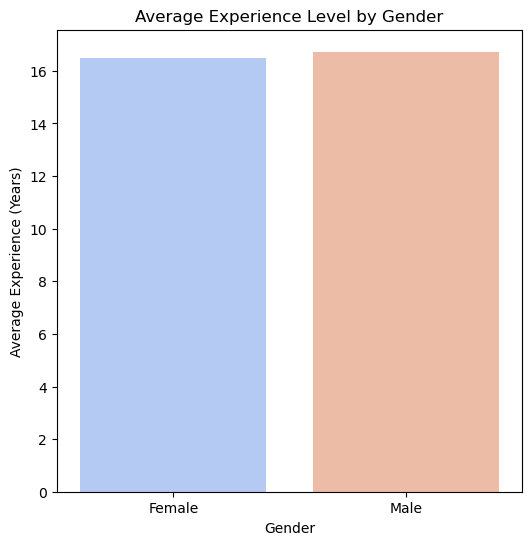

In [24]:
# Calculate average experience level by gender
avg_experience = gender_salary_data.groupby('Gender')['Experience (Years)'].mean()

# Display the average experience by gender
print("Average Experience Level by Gender:")
print(avg_experience)

# Plot the average experience level by gender

plt.figure(figsize=(6, 6))
sns.barplot(x=avg_experience.index, y=avg_experience.values, palette="coolwarm")
plt.title("Average Experience Level by Gender")
plt.ylabel("Average Experience (Years)")
plt.xlabel("Gender")
plt.show()


In [25]:

# Handle missing data (drop or fill)
data = data.dropna(subset=['Position', 'Experience (Years)', 'Salary'])

# Convert categorical variables (Position, Gender, Education, Location) to numeric values using encoding
data['Position_encoded'] = data['Position'].astype('category').cat.codes
data['Gender_encoded'] = data['Gender'].astype('category').cat.codes
data['Education_encoded'] = data['Education'].astype('category').cat.codes
data['Location_encoded'] = data['Location'].astype('category').cat.codes

# Features and Target
X = data[['Experience (Years)', 'Position_encoded', 'Gender_encoded', 'Education_encoded', 'Location_encoded']]
y = data['Salary']


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model (you can also use Linear Regression)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model (you can also try LinearRegression())
print(f"Model Score: {model.score(X_test, y_test)}")


Model Score: -0.10080220051421973


In [27]:
# Make predictions for the future (e.g., 10 years from now)
future_experience = 10  # Assuming you want to predict for people with 10 years of experience

# We will use the average encoded values for position, gender, education, and location
future_data = pd.DataFrame({
    'Experience (Years)': [future_experience] * len(data['Position'].unique()),  # Assume future employees with 10 years of experience
    'Position_encoded': range(len(data['Position'].unique())),  # Loop through job positions
    'Gender_encoded': [data['Gender_encoded'].mode()[0]] * len(data['Position'].unique()),  # Use most frequent gender
    'Education_encoded': [data['Education_encoded'].mode()[0]] * len(data['Position'].unique()),  # Use most frequent education
    'Location_encoded': [data['Location_encoded'].mode()[0]] * len(data['Position'].unique())  # Use most frequent location
})

# Predict future salary for different positions
future_predictions = model.predict(future_data)

# Add predicted salaries to the future data and create a new dataframe
future_data['Predicted Salary'] = future_predictions
future_data['Predicted Job'] = future_data['Position_encoded'].apply(lambda x: data['Position'].unique()[x])

# Display the predicted future jobs and salaries
print(future_data[['Predicted Job', 'Predicted Salary']].sort_values(by='Predicted Salary', ascending=False))


                         Predicted Job  Predicted Salary
614                         oracle ebs        2159176.35
615                Oracle BI ETL Devel        2116234.43
616               PEOPLESOFT DEVELOPER        2113548.15
613                 Data science AI/ML        2091787.17
617  Oracle,PLSQL,Unix shell Scripting        2073980.59
..                                 ...               ...
39              Senior Analyst - UI/UX         933192.64
37                        Scrum Master         924783.30
38                         QA Engineer         920195.62
350                  Software Engineer         911472.05
349                           Power BI         870857.85

[808 rows x 2 columns]


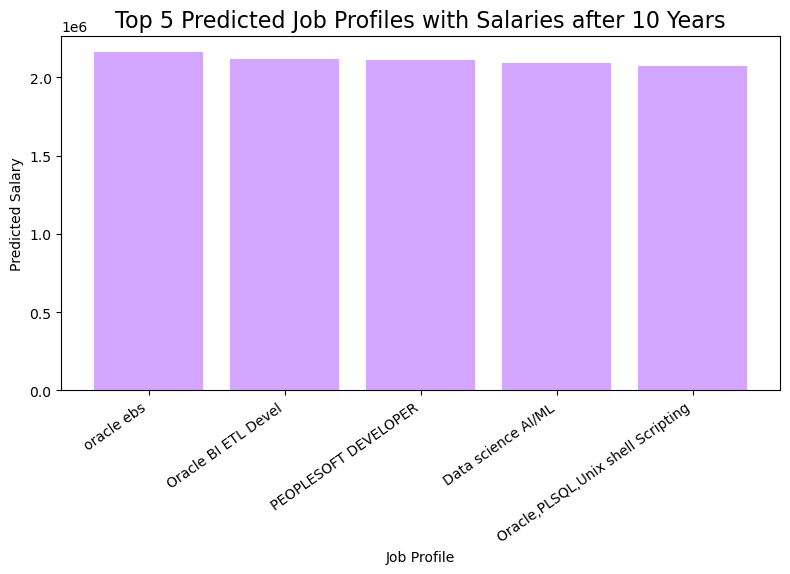

In [28]:
import matplotlib.pyplot as plt

# Sort the data by Predicted Salary in descending order and select the top 5
top_5_future_data = future_data.sort_values(by='Predicted Salary', ascending=False).head(5)

# Plot the top 5 job profiles (vertical bar chart) with light purple color
plt.figure(figsize=(8, 6))
plt.bar(top_5_future_data['Predicted Job'], top_5_future_data['Predicted Salary'], color='#D3A6FF')  # Light purple color
plt.title('Top 5 Predicted Job Profiles with Salaries after 10 Years', fontsize=16)
plt.xlabel('Job Profile', fontsize=10)
plt.ylabel('Predicted Salary', fontsize=10)
plt.xticks(rotation=35, ha='right', fontsize=10)  # Rotate the x-axis labels for readability
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
#To display only the top 5 education levels based on their frequency across all positions

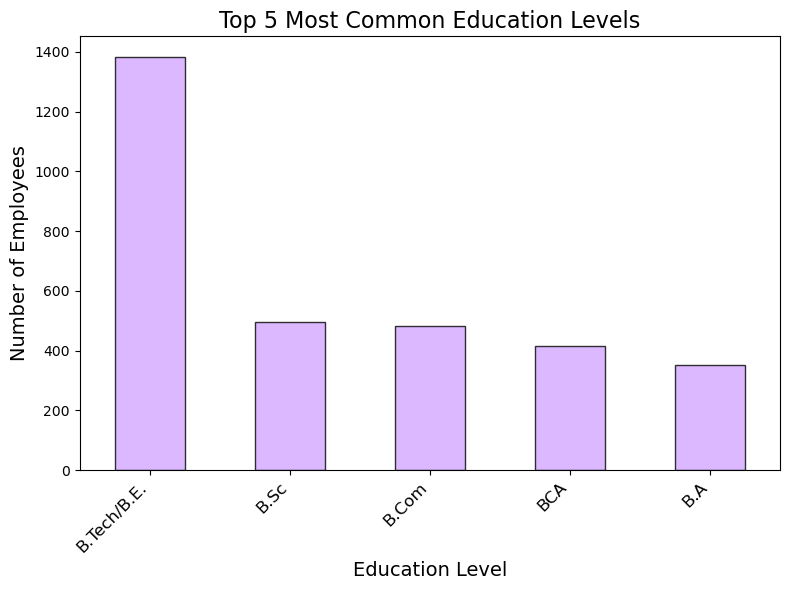

In [33]:


# Aggregate the total count of each education level across all positions
total_education_counts = data.groupby('Education').size()

# Sort the education levels by total count and select the top 5
top_5_education = total_education_counts.sort_values(ascending=False).head(5)

# Visualization: Bar chart for the top 5 education levels
plt.figure(figsize=(8, 6))
top_5_education.plot(kind='bar', color='#D3A6FF', alpha=0.8, edgecolor='black')
plt.title('Top 5 Most Common Education Levels', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#analyze Salary Trends by Location and visualize the top 5 locations based on average salary trends over time,

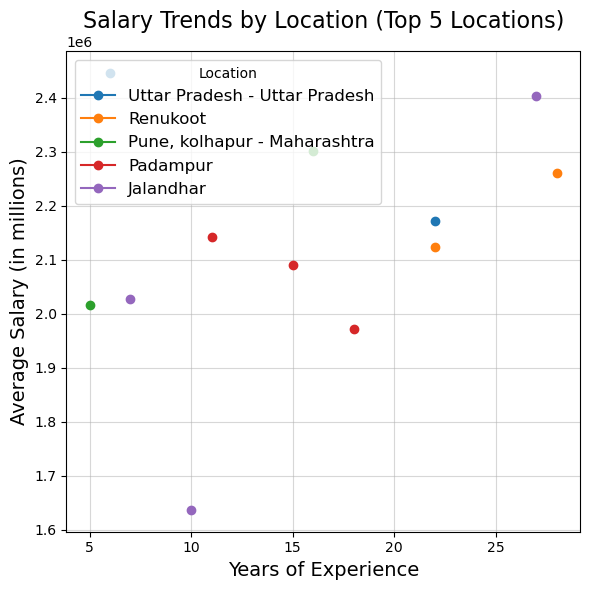

In [38]:
import matplotlib.pyplot as plt

# Group by Location and Experience (Years) to calculate trends
salary_trends = data.groupby(['Location', 'Experience (Years)'])['Salary'].mean().unstack()

# Filter top 5 locations with highest average salaries
average_salary_by_location = data.groupby('Location')['Salary'].mean()
top_5_locations = average_salary_by_location.sort_values(ascending=False).head(5).index
salary_trends_top5 = salary_trends.loc[top_5_locations]

# Line graph visualization
plt.figure(figsize=(6, 6))
for location in salary_trends_top5.index:
    plt.plot(
        salary_trends_top5.columns, 
        salary_trends_top5.loc[location], 
        marker='o', 
        label=location
    )

plt.title('Salary Trends by Location (Top 5 Locations)', fontsize=16)
plt.xlabel('Years of Experience', fontsize=14)
plt.ylabel('Average Salary (in millions)', fontsize=14)
plt.legend(title='Location', loc='upper left', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()
